### Import modules

In [1]:
import numpy as np
import json
from matplotlib import pyplot as plt

In [2]:
fs = 20

### Import Shocks & f(r)

For shocks, we rely on [Berdichevsky et al. 2000](https://onlinelibrary.wiley.com/doi/abs/10.1029/1999JA000367).

In [3]:
with open('shocks_from_Berdichevsky.json') as file:
    shocks = json.load(file)
    
villante_sub = False
# villante_sub = {'20', '22', '23', '24', '26', '28', '29', '34', '35', '36', '38', '40', '41', '42'}
if villante_sub:
    villante_dict = {}
    for shock_id in villante_sub:
        villante_dict[shock_id] = shocks[shock_id]
    shocks = villante_dict

For f(r), we rely on [Dimmock & Nykyri 2013](https://onlinelibrary.wiley.com/doi/abs/10.1002/jgra.50465).

In [4]:
f_nose = (0.2, 0.05) #(avg, std dev)
f_terminator = (0.75, 0.05) #(avg, std dev)
f_flank = f_terminator

### Hypotheses

The multiplicative hypothesis: $V^s_{msh}(\vec{r}) = f(\vec{r})  V^s_{sw}$ 

The additive hypothesis: $V^s_{msh}(\vec{r}) = V^s_{sw} + (f(\vec{r}) - 1)  V^p_{sw}$ 


In [5]:
def multiplicative(v_ssw, f):
    v_smsh = v_ssw*f[0]
    return v_smsh

def additive(v_ssw, v_psw, f):
    v_smsh = v_ssw + (f[0]-1)*v_psw
    return v_smsh

### Main Code

In [6]:
N = len(shocks)
list_labels = [label for label in shocks]
list_v_ssw = [np.linalg.norm(shocks[shock]['Vs']) for shock in shocks]
list_v_psw_plasma_frame = [shocks[shock]['Vs_up'][0] for shock in shocks]

list_v_psw = []
for j in range(0, N):
    v_psw = list_v_ssw[j] - list_v_psw_plasma_frame[j]
    list_v_psw = list_v_psw + [v_psw]
    
print(f"avg v_ssw = {np.mean(list_v_ssw):0.0f}")
print(f"avg v_psw = {np.mean(list_v_psw):0.0f}")

avg v_ssw = 401
avg v_psw = 324


In [7]:
list_v_smsh_nose_multi = [multiplicative(v, f_nose) for v in list_v_ssw]

list_v_smsh_nose_add = []
for j in range(0, N):
    v_smsh = additive(list_v_ssw[j], list_v_psw[j], f_nose)
    list_v_smsh_nose_add = list_v_smsh_nose_add + [v_smsh]
    
print(f"avg v_smsh_nose_multi = {np.mean(list_v_smsh_nose_multi):0.0f}")
print(f"avg v_smsh_nose_add = {np.mean(list_v_smsh_nose_add):0.0f}")

avg v_smsh_nose_multi = 80
avg v_smsh_nose_add = 142


In [8]:
list_v_smsh_flank_multi = [multiplicative(v, f_flank) for v in list_v_ssw]

list_v_smsh_flank_add = []
for j in range(0, N):
    v_smsh = additive(list_v_ssw[j], list_v_psw[j], f_flank)
    list_v_smsh_flank_add = list_v_smsh_flank_add + [v_smsh]
    
print(f"avg v_smsh_nose_multi = {np.mean(list_v_smsh_flank_multi):0.0f}")
print(f"avg v_smsh_nose_add = {np.mean(list_v_smsh_flank_add):0.0f}")

avg v_smsh_nose_multi = 301
avg v_smsh_nose_add = 320


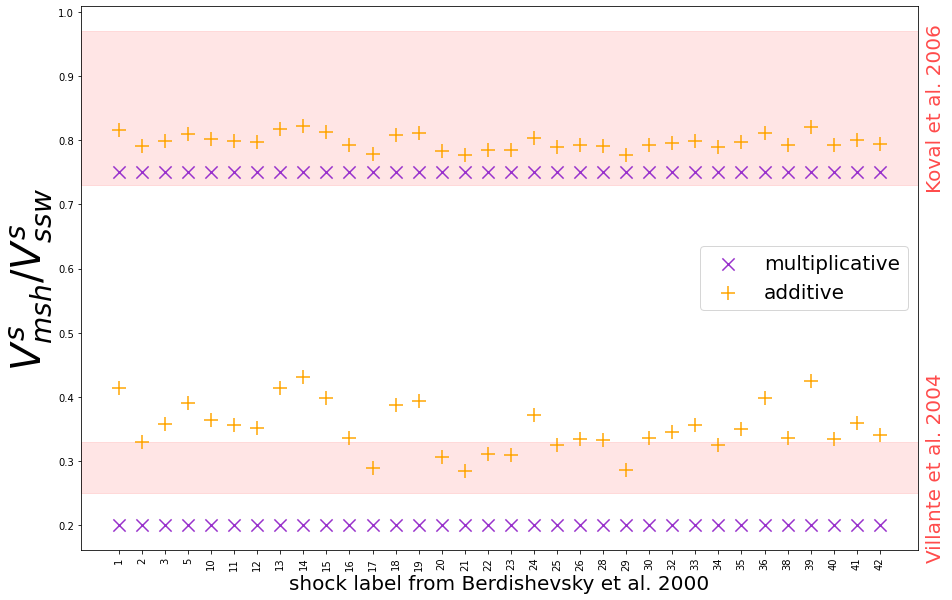

In [10]:
plt.rcParams["figure.figsize"] = (15,10)

x = np.linspace(0,len(list_labels),len(list_labels))
plt.scatter(y = np.array(list_v_smsh_nose_multi) / np.array(list_v_ssw), x=x, label="multiplicative", color="darkorchid", marker="x", s=150)


ax = plt.gca()
ax.axhspan(0.25,0.33,color='red',alpha=0.1)
ax.text(ax.get_xlim()[1]*1.01, (0.33+0.25)/2, "Villante et al. 2004",
        verticalalignment='center', color='red', alpha=0.7, rotation='vertical', fontsize = fs)
ax.axhspan(0.73,0.97,color='red',alpha=0.1)
ax.text(ax.get_xlim()[1]*1.01, (0.73+0.97)/2, "Koval et al. 2006",
        verticalalignment='center', color='red', alpha=0.7, rotation='vertical', fontsize = fs)

plt.scatter(y = np.array(list_v_smsh_flank_add) / np.array(list_v_ssw), x=x, label="additive", color='orange', marker="+", s=200)
plt.scatter(y = np.array(list_v_smsh_nose_add) / np.array(list_v_ssw), x=x, color='orange', marker="+", s=200)
plt.scatter(y = np.array(list_v_smsh_flank_multi) / np.array(list_v_ssw), x=x, color="darkorchid", marker="x", s=150)

plt.xticks(x, list_labels, rotation='vertical')
plt.xlabel("shock label from Berdishevsky et al. 2000", fontsize = fs)
plt.ylabel(r"$V^s_{msh} / V^s_{ssw} $ ", fontsize = fs*2)
plt.legend(fontsize = fs)

# plt.savefig('reconciliation.pdf', bbox_inches='tight', pad_inches=0.01)
plt.savefig('reconciliation.jpg', dpi=200, bbox_inches='tight', pad_inches=0.01)

plt.show()

# Test that the additive method conserves shock speed in plasma frame
# print(np.array(list_v_smsh_nose_add) - f_nose[0]*np.array(list_v_psw))
# print(np.array(list_v_smsh_flank_add) - f_flank[0]*np.array(list_v_psw))
# print(np.array(list_v_ssw) - np.array(list_v_psw))